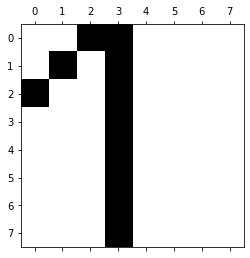

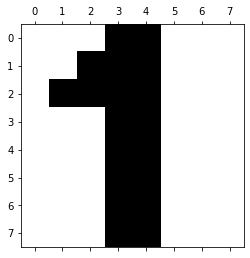

[-1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1]


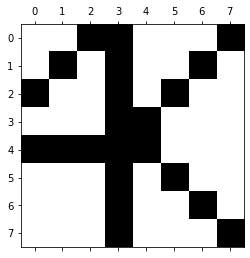

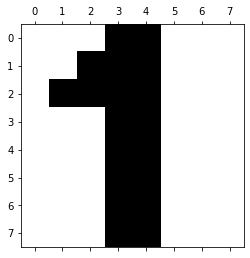

[-1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1]


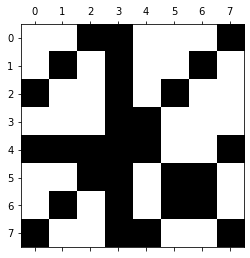

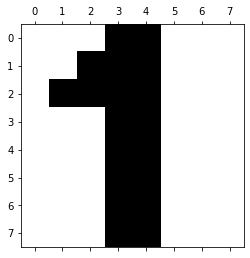

[-1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1]


In [44]:
from tkinter import *
import functools
from matplotlib import pyplot as plt
import numpy as np
import numpy.matlib as matlib
from matplotlib.colors import LogNorm
import itertools
import random
import math

def SamplePatterns():
    w = []
    w.append([-1,-1,-1, 1, 1,-1,-1,-1,
              -1,-1, 1, 1, 1,-1,-1,-1,
              -1, 1, 1, 1, 1,-1,-1,-1,
              -1,-1,-1, 1, 1,-1,-1,-1,
              -1,-1,-1, 1, 1,-1,-1,-1,
              -1,-1,-1, 1, 1,-1,-1,-1,
              -1,-1,-1, 1, 1,-1,-1,-1,
              -1,-1,-1, 1, 1,-1,-1,-1,
             ])
    return np.array(w)
sampleShapes = SamplePatterns()

def hebb_weight(patterns):
    row , col = np.shape(patterns)
    weight = np.multiply(np.matmul(patterns.T,patterns),(np.ones(col)-np.identity(col)))
    return weight
def discrete(x):
    if x>=0: return 1
    else:return -1
def hopfield(noisy,patterns , n_iter):
    weight = np.array(hebb_weight(patterns))
    col, row = np.shape(weight)
    
    output = np.zeros(col)
    temp = noisy
    
    for i in range (1, n_iter+1):
        plt.matshow(np.reshape(temp,(-1,8)), cmap=plt.cm.binary)
        for k in np.random.permutation(col):
            if (weight[k,].any()!=0.0):
                temp[k] = discrete (np.matmul(weight[k,],temp))
        if (temp==output).all():
            break
        output = temp
    return output, i

class GUI(Frame):
    def __init__(self,root):
        Frame.__init__(self,root)
        self.mtx_input=[]
        self.mtx_output=[]
        self.mtx_aux=[]
        self.setUp()
        
    def setUp(self):
        #Makes the input zone
        yPos=1
        xPos=1
        for pos in range(64):
            self.mtx_aux.append(-1)
            if(yPos == 9):
                xPos = xPos + 1
                yPos = 1
            if(xPos == 9):
                yPos = 2
            self.mtx_input.append(Button(root,width=3,text="",command = functools.partial(self.pressed,idx=pos)))
            self.mtx_input[pos].grid(row=xPos,column=yPos)
            self.mtx_output.append(Button(root,width=3,text=""))
            self.mtx_output[pos].grid(row=xPos+10,column=yPos)
            yPos=yPos+1
        self.btn_submit=Button(root,width=8,text="Calcular",command=self.export)
        self.btn_submit.grid(row=10,column=0,columnspan=10)
        
    def pressed(self,idx):
        #print("number pressed",idx)
        if(self.mtx_aux[idx]==-1):
            self.mtx_aux[idx]=1
            self.mtx_input[idx].configure(bg="black")
        else:
            self.mtx_aux[idx]=-1
            self.mtx_input[idx].configure(bg="white")
        
    def export(self):
        output, niter = hopfield(np.array(self.mtx_aux),patterns , 10)
        plt.show()
        print(output)
   
root=Tk()
root.resizable(False,False)
root.geometry("300x600")
root.title("Predictor de Figuras")
root.columnconfigure(0,weight=1)
root.columnconfigure(10,weight=1)
root.rowconfigure(0,weight=1)
root.rowconfigure(10,weight=1)
root.rowconfigure(20,weight=1)
app = GUI(root)
root.mainloop()